# Prize-Collecting Steiner Tree (PCSTP)

## Libs Importing

In [1]:
import sys
import os
import time
import networkx as nx
from typing import Tuple, Set

sys.path.insert(1, os.path.realpath(os.path.pardir))

In [2]:
from pcstp.instances.generator import generate_random_steiner
from pcstp.utils.draw import draw_steiner_graph

## Experiments

In [3]:
G, (nodes, edges, position_matrix, edges_cost, terminals, prizes) = generate_random_steiner(
    num_nodes=25,
    num_edges=20,
    max_node_degree=10,
    min_prize=0,
    max_prize=100,
    num_terminals=5,
    min_edge_cost=0,
    max_edge_cost=10,
    cost_as_length=False,
    max_iter=100,
    seed=11
)

terminals:  (5,)
prizes:  (5,)


In [4]:
from pcstp.steinertree import SteinerTreeProblem
from pcstp.instances.reader import SteinlibReader, DatReader
from pcstp.solver.base import computes_steiner_cost

The instance can be imported from a file or generated through the instance generator presented above.

In [5]:
stp_reader = SteinlibReader()
stp = stp_reader.parser(filename='../data/instances/stp/C01-A.stp')

In [6]:
stp = SteinerTreeProblem(graph=G, terminals=terminals)

In [7]:
from pcstp.solver.base import computes_steiner_cost

In [8]:
from pcstp.utils.graph import preprocessing

In [9]:
G, terminals = preprocessing(stp.graph, stp.terminals)

Iteration: 1 - Removing nodes: [2, 6, 7, 9, 10, 11, 13, 14, 15, 16, 22]
Iteration: 2 - Removing nodes: [4, 5, 19, 20, 21]


In [10]:
stp_preprocessed = SteinerTreeProblem(graph=G, terminals=terminals)

## Solution obtained with NetworkX Steiner Tree Approximation Algorithm

In [11]:
start_time = time.time()

nx_steiner_tree = nx.algorithms.approximation.steinertree.steiner_tree(
    stp_preprocessed.graph,
    stp_preprocessed.terminals,
    weight='cost'
)

networkx_duration = time.time() - start_time
networkx_cost = computes_steiner_cost(G, nx_steiner_tree, terminals)
print(f'Cost: {networkx_cost}')


Cost: 39


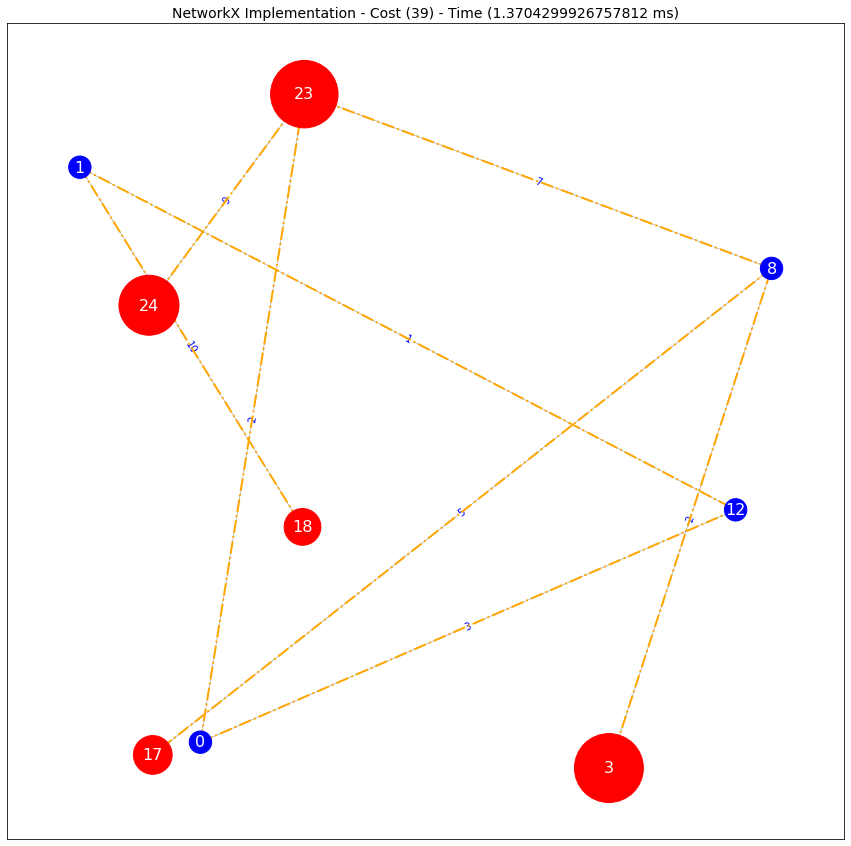

In [12]:
draw_steiner_graph(
    stp_preprocessed.graph,
    steiner_graph=nx_steiner_tree,
    plot_title=f'NetworkX Implementation - Cost ({networkx_cost}) - Time ({networkx_duration * 1000} ms)',
    node_label='name'
)


## Solution obtained with Ant Colony Optimization

In [13]:
from pcstp.solver.aco import AntColony

In [14]:
list(stp.graph.neighbors(24))

[4, 23, 22]

In [16]:
# %%timeit -n 100

solver = AntColony(stp_preprocessed.graph, stp_preprocessed.terminals, num_ants=1, log_level='debug')
steiner_tree, greedy_cost = solver.solve()


2022-01-21 09:37:39,645 - [aco.py:81] - DEBUG - Initializing ants...
2022-01-21 09:37:39,648 - [aco.py:86] - DEBUG - Initializing pheromones (strategy same)...
2022-01-21 09:37:39,652 - [aco.py:298] - DEBUG - (24 -> 23) eta 1 tau 8.2 probability_numerator 8.2
2022-01-21 09:37:39,654 - [aco.py:319] - DEBUG - transition_probability ([23]) [1.]
2022-01-21 09:37:39,656 - [aco.py:328] - DEBUG - Ant 0 is moving from 24 to 23
2022-01-21 09:37:39,657 - [aco.py:298] - DEBUG - (23 -> 0) eta 1 tau 0.3333333333333333 probability_numerator 0.3333333333333333
2022-01-21 09:37:39,660 - [aco.py:298] - DEBUG - (23 -> 8) eta 1 tau 0.125 probability_numerator 0.125
2022-01-21 09:37:39,661 - [aco.py:298] - DEBUG - (23 -> 24) eta 1 tau 6.3 probability_numerator 6.3
2022-01-21 09:37:39,663 - [aco.py:319] - DEBUG - transition_probability ([0, 8, 24]) [0.04932182 0.01849568 0.93218249]
2022-01-21 09:37:39,665 - [aco.py:328] - DEBUG - Ant 0 is moving from 23 to 24
2022-01-21 09:37:39,666 - [aco.py:298] - DEBUG

NetworkXNoPath: path does not exist

In [ ]:
print(f'Cost: {solver.steiner_cost}')

In [ ]:
# %%timeit -n 100

preprocessed_graph_solver = AntColony(stp_preprocessed.graph, stp_preprocessed.terminals, log_level='info')
preprocessed_graph_steiner_tree, preprocessed_graph_greedy_cost = preprocessed_graph_solver.solve()

In [ ]:
print(f'Cost: {preprocessed_graph_greedy_cost}')

In [ ]:
draw_steiner_graph(
    stp.graph,
    steiner_graph=steiner_tree,
    plot_title=f'Greedy Heuristic (Shortest Path) - Cost ({greedy_cost}) - Time ({solver._duration * 1000} ms)',
    node_label='name'
)

In [ ]:
draw_steiner_graph(
    stp.graph,
    steiner_graph=preprocessed_graph_steiner_tree,
    plot_title=f'Greedy Heuristic (Shortest Path) - Cost ({preprocessed_graph_greedy_cost}) - Time ({preprocessed_graph_solver._duration * 1000} ms)',
    node_label='name'
)
